# Project Python Foundations: FoodHub Data Analysis
Presented by: Rolando Lopez

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [238]:
# # uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [239]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# to export plotly graphs to html, reference https://community.plotly.com/t/plotly-graph-not-showing-up-in-rendered-html/72739
import plotly.io as pio
pio.renderers.default = "notebook_connected"

### Understanding the structure of the data

In [240]:
# Write your code here to read the data
df = pd.read_csv('/content/drive/MyDrive/Education/DBA AI/M01 Python Foundations/project 1 - Food Hub/foodhub_order.csv')

In [241]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [242]:
df.shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the data.")

There are 1898 rows and 9 columns in the data.


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [244]:
print("There are no null/NaN missing values per se in any columns:")
display(df.isnull().sum())
print('')
print(f"However, column 'rating' does have {(df['rating']=='Not given').sum()} rows with 'Not given' value.")

# missing value treatment will begin after answering question #5

There are no null/NaN missing values per se in any columns:


,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0



However, column 'rating' does have 736 rows with 'Not given' value.


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [245]:
print("Statistical summary of the data is as follows:")
display(df.describe().T)

# saving the stats for food_preparation_time column
df_food_prep_stats = df['food_preparation_time'].describe().loc[['min','mean','max']]

print('')
print(f"Regarding the food prep time, the stats (in minutes) are: min is {df_food_prep_stats['min']}, the mean is {round(df_food_prep_stats['mean'],2)} and the max is {df_food_prep_stats['max']}.")

Statistical summary of the data is as follows:


,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00



Regarding the food prep time, the stats (in minutes) are: min is 20.0, the mean is 27.37 and the max is 35.0.


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [246]:
not_rated_count = (df['rating']=='Not given').sum()
print(f"There are {not_rated_count} samples where rating was 'Not given', which is a {round((not_rated_count / df.shape[0]) *100,2)}% of the samples.")

There are 736 samples where rating was 'Not given', which is a 38.78% of the samples.


#### Observations:


### Exploratory Data Analysis (EDA)

### **Univariate Analysis**

---

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [247]:
print('Most ordered cuisine type is American, followed by Japanese')
px.histogram(df, x = 'cuisine_type', text_auto=True, title='Order count by Cuisine type')

Most ordered cuisine type is American, followed by Japanese


In [248]:
print('Cost of order is right skewed, no outliers, with 50% of samples between 12.08-22.31')
px.histogram(df, x = 'cost_of_the_order', nbins=10, text_auto=True, marginal='box', title='Cost of orders')

Cost of order is right skewed, no outliers, with 50% of samples between 12.08-22.31


In [249]:
print('Most orders are placed on weekdays')
px.histogram(df, x = 'day_of_the_week', text_auto=True, title='Order count by weekday vs weekend')

Most orders are placed on weekdays


In [250]:
print("Food preparation has roughly an uniform distribution, with 50% of the data between 23-31 minutes")
px.histogram(df, x='food_preparation_time',text_auto=True, marginal='box', nbins=5, title='Food preparation time (minutes)')

Food preparation has roughly an uniform distribution, with 50% of the data between 23-31 minutes


In [251]:
print("Delivery time has no clear distribution, 50% of the samples are between 20-28 minutes")
px.histogram(df, x = 'delivery_time',text_auto=True, marginal='box', nbins=5, title='Delivery time (minutes)')

Delivery time has no clear distribution, 50% of the samples are between 20-28 minutes


In [252]:
print("The most frequent ocurrance is that a rating isn't given, the 2nd most frequent rating is 5")
px.histogram(df, x = 'rating',text_auto=True, title='Rating count')

The most frequent ocurrance is that a rating isn't given, the 2nd most frequent rating is 5


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [253]:
top_5_restaurants = df['restaurant_name'].value_counts(ascending=False).head(5)

print("The top 5 restaurants in terms of the number of orders received are:")
display(top_5_restaurants)

px.bar(top_5_restaurants, text_auto=True,
             x=top_5_restaurants.index,
             y=top_5_restaurants.values,
             labels={'x':'Restaurant Name', 'y':'Number of Orders'},
             title='Top 5 Restaurants by Order Count')

The top 5 restaurants in terms of the number of orders received are:


,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [254]:
print(f"The most popular cuisine on weekends is:")
display(df[(df['day_of_the_week']=='Weekend')].value_counts('cuisine_type').head(1))

The most popular cuisine on weekends is:


,count
cuisine_type,
American,415


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [255]:
print(f"{round(df[df['cost_of_the_order']>20].shape[0]/df.shape[0]*100,2)}% of the orders cost more than 20 dollars")

29.24% of the orders cost more than 20 dollars


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [256]:
print(f"The avg order delivery time is {round(df['delivery_time'].mean(),2)} minutes")

The avg order delivery time is 24.16 minutes


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [257]:
print("The top 3 most frequent customers, and their respective order count is below:")
display(df['customer_id'].value_counts().head(3))


The top 3 most frequent customers, and their respective order count is below:


,count
customer_id,
52832,13
47440,10
83287,9



#### Observations:


### **Multivariate Analysis**

---



### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Cost per cuisine type (cuisine_type VS cost_of_the_order)

In [258]:
px.box(df, x='cuisine_type', y='cost_of_the_order', title='Cost of orders by cuisine type', labels={'cuisine_type':'Cuisine type', 'cost_of_the_order':'Cost of order (USD)'})

#### Cuisine type VS food preparation time

In [259]:
px.box(df, x='cuisine_type', y='food_preparation_time', title='Food preparation time by cuisine type', labels={'cuisine_type':'Cuisine type', 'food_preparation_time':'Food preparation time (mins)'})

#### Rating VS total time (food prep + delivery)

In [260]:
# new columns for EDA ======
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
# rating_num will be used in all plots that require a numerical value
df['rating_num'] = df['rating'].replace('Not given', np.nan).astype(float)


px.strip(df, x='rating', y='total_time', title='Rating VS total time (food prep + delivery)', labels={'rating':'Rating', 'total_time':'Total time (mins)'})

#### Rating by cuisine type

In [261]:
px.box(df, x='cuisine_type', y='rating_num', title='Rating by cuisine type', labels={'cuisine_type':'Cuisine type', 'rating_num':'Rating'})

#### Correlation amongst numerical variables

There doesn't seem to be any clear correlation amongst any numerical variables


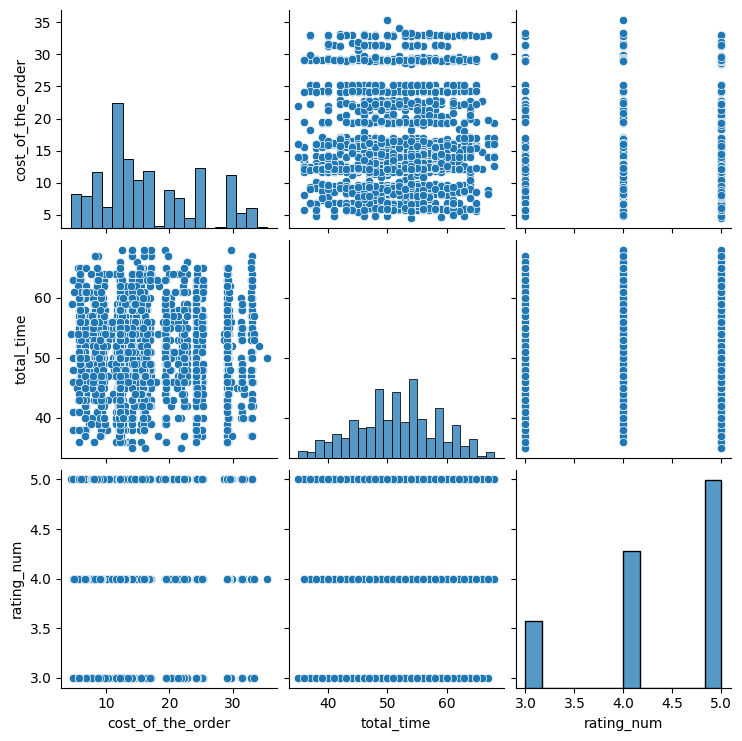

In [262]:
print("There doesn't seem to be any clear correlation amongst any numerical variables")
sns.pairplot(df[['cost_of_the_order', 'total_time', 'rating_num']]);

#### Correlation Heatmap

In [263]:
print("There doesn't seem to be any clear correlation amongst any numerical variables")
px.imshow(df[['cost_of_the_order', 'total_time', 'rating_num']].corr(), text_auto=True, title='Correlation heatmap')

There doesn't seem to be any clear correlation amongst any numerical variables


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [264]:
#https://jamesrledoux.com/code/group-by-aggregate-pandas

df_rest_ad_promo = df.groupby('restaurant_name').agg({'rating_num':['mean', 'count']})

df_rest_ad_promo.columns = ['rating_avg', 'rating_count']

df_rest_ad_promo = df_rest_ad_promo.reset_index()
df_rest_ad_promo['rating_avg'] = df_rest_ad_promo['rating_avg'].round(2)

print("The restaurants fulfilling the rating criteria of 50+ rating count and 4+ rating avg are:")
display(df_rest_ad_promo.query('rating_avg > 4 & rating_count > 50').sort_values('rating_count', ascending=False))


The restaurants fulfilling the rating criteria of 50+ rating count and 4+ rating avg are:


,restaurant_name,rating_avg,rating_count
136,Shake Shack,4.28,133
153,The Meatball Shop,4.51,84
21,Blue Ribbon Sushi,4.22,73
20,Blue Ribbon Fried Chicken,4.33,64


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [265]:
df['revenue_per_order'] = np.where(df['cost_of_the_order']>20, df['cost_of_the_order']*0.25 , df['cost_of_the_order']*0.15)

cost_total = df['cost_of_the_order'].sum()
revenue_total = df['revenue_per_order'].sum().round(2)

print(f"The total cost of the orders is ${cost_total:,}, and the net revenue generated out of that is: ${revenue_total:,}, which is {round((revenue_total/cost_total)*100,2)}%")

The total cost of the orders is $31,314.82, and the net revenue generated out of that is: $6,172.71, which is 19.71%


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [266]:
print(f"The percentage of orders that take more than 60 minutes to get delivered is: {round(df.query('total_time > 60').shape[0]/df.shape[0]*100,2)}%")

The percentage of orders that take more than 60 minutes to get delivered is: 10.54%


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [267]:
print("The avg delivery time is higher on the weekdays rather than weekends")
px.bar(df.groupby('day_of_the_week')['delivery_time'].mean().round(2)
       ,labels={'day_of_the_week':'Day of the week', 'value':'Mean delivery time (min)'}, title='Avg delivery time (minutes) by weekday and weekend' ,text_auto=True)

The avg delivery time is higher on the weekdays rather than weekends


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### **Conclusions and Recommendations**


---

Food Hub can significantly improve its operations by addressing key issues identified in the EDA. These include increasing customer engagement through a more proactive rating system, optimizing kitchen and delivery operations, and leveraging top-rated restaurants to attract more customers. By implementing these recommendations, Food Hub can enhance customer satisfaction, boost revenue, and solidify its position in the market.

**1. Missing Ratings:**
* **Conclusion:** A significant portion of orders lack ratings. This could indicate user apathy or a system issue.
* **Recommendation:** Implement a more proactive rating system, perhaps with incentives or reminders. Analyze user behavior to identify reasons for low ratings and address them.

**2. Order Cost and Cuisine:**
* **Conclusion:** Order costs are skewed towards lower values, with American and Japanese cuisines being the most popular.
* **Recommendation:** Consider offering promotions or discounts on higher-priced items to balance revenue. Analyze customer preferences for popular cuisines to tailor marketing strategies.

**3. Order Timing:**
* **Conclusion:** Weekday orders dominate, and food preparation and delivery times are relatively consistent.
* **Recommendation:** Optimize kitchen operations to maintain consistent delivery times, especially during peak hours. Explore potential discounts or loyalty programs to encourage weekend orders.

**4. Customer Ratings:**
* **Conclusion:** Most customers don't rate their orders, and those who do, tend to give high ratings.
* **Recommendation:** Improve the rating system to encourage more feedback. Analyze low ratings to identify areas for improvement.

**5. Order Value and Revenue:**
* **Conclusion:** A significant portion of orders exceed $20, but the net revenue margin is relatively low.
* **Recommendation:** Explore strategies to increase average order value, such as upselling or bundling. Analyze cost structures to improve profit margins.

**6. Top-Rated Restaurants:**
* **Conclusion:** Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken consistently receive high ratings.
* **Recommendation:** Leverage these top-rated restaurants for marketing campaigns and promotions. Consider partnerships or exclusive offers to attract more customers.

**7. Delivery Performance:**
* **Conclusion:** A small percentage of orders take over 60 minutes to deliver, and weekday deliveries are slower than weekend deliveries.
* **Recommendation:** Investigate the reasons for longer delivery times, especially on weekdays. Consider optimizing delivery routes or partnering with more efficient delivery services.

---